In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
from sklearn.model_selection import train_test_split

In [59]:
df=pd.read_csv('voice.csv')
print('Loaded Successfully..')
df.head()

Loaded Successfully..


,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,...,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx,label
0,0.059781,0.064241,0.032027,0.015071,0.090193,0.075122,12.863462,274.402906,0.893369,0.491918,...,0.059781,0.084279,0.015702,0.275862,0.007812,0.007812,0.007812,0.000000,0.000000,male
1,0.066009,0.067310,0.040229,0.019414,0.092666,0.073252,22.423285,634.613855,0.892193,0.513724,...,0.066009,0.107937,0.015826,0.250000,0.009014,0.007812,0.054688,0.046875,0.052632,male
2,0.077316,0.083829,0.036718,0.008701,0.131908,0.123207,30.757155,1024.927705,0.846389,0.478905,...,0.077316,0.098706,0.015656,0.271186,0.007990,0.007812,0.015625,0.007812,0.046512,male
3,0.151228,0.072111,0.158011,0.096582,0.207955,0.111374,1.232831,4.177296,0.963322,0.727232,...,0.151228,0.088965,0.017798,0.250000,0.201497,0.007812,0.562500,0.554688,0.247119,male
4,0.135120,0.079146,0.124656,0.078720,0.206045,0.127325,1.101174,4.333713,0.971955,0.783568,...,0.135120,0.106398,0.016931,0.266667,0.712812,0.007812,5.484375,5.476562,0.208274,male


In [60]:
df.dtypes

meanfreq    float64
sd          float64
median      float64
Q25         float64
Q75         float64
IQR         float64
skew        float64
kurt        float64
sp.ent      float64
sfm         float64
mode        float64
centroid    float64
meanfun     float64
minfun      float64
maxfun      float64
meandom     float64
mindom      float64
maxdom      float64
dfrange     float64
modindx     float64
label        object
dtype: object

In [61]:
df['label'].value_counts()

female    1584
male      1584
Name: label, dtype: int64

In [62]:
df.shape

(3168, 21)

In [63]:
df.isnull().sum()

meanfreq    0
sd          0
median      0
Q25         0
Q75         0
IQR         0
skew        0
kurt        0
sp.ent      0
sfm         0
mode        0
centroid    0
meanfun     0
minfun      0
maxfun      0
meandom     0
mindom      0
maxdom      0
dfrange     0
modindx     0
label       0
dtype: int64

In [64]:
df.describe()

,meanfreq,sd,median,Q25,Q75,IQR,skew,kurt,sp.ent,sfm,mode,centroid,meanfun,minfun,maxfun,meandom,mindom,maxdom,dfrange,modindx
count,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000,3168.000000
mean,0.180907,0.057126,0.185621,0.140456,0.224765,0.084309,3.140168,36.568461,0.895127,0.408216,0.165282,0.180907,0.142807,0.036802,0.258842,0.829211,0.052647,5.047277,4.994630,0.173752
std,0.029918,0.016652,0.036360,0.048680,0.023639,0.042783,4.240529,134.928661,0.044980,0.177521,0.077203,0.029918,0.032304,0.019220,0.030077,0.525205,0.063299,3.521157,3.520039,0.119454
min,0.039363,0.018363,0.010975,0.000229,0.042946,0.014558,0.141735,2.068455,0.738651,0.036876,0.000000,0.039363,0.055565,0.009775,0.103093,0.007812,0.004883,0.007812,0.000000,0.000000
25%,0.163662,0.041954,0.169593,0.111087,0.208747,0.042560,1.649569,5.669547,0.861811,0.258041,0.118016,0.163662,0.116998,0.018223,0.253968,0.419828,0.007812,2.070312,2.044922,0.099766
50%,0.184838,0.059155,0.190032,0.140286,0.225684,0.094280,2.197101,8.318463,0.901767,0.396335,0.186599,0.184838,0.140519,0.046110,0.271186,0.765795,0.023438,4.992188,4.945312,0.139357
75%,0.199146,0.067020,0.210618,0.175939,0.243660,0.114175,2.931694,13.648905,0.928713,0.533676,0.221104,0.199146,0.169581,0.047904,0.277457,1.177166,0.070312,7.007812,6.992188,0.209183
max,0.251124,0.115273,0.261224,0.247347,0.273469,0.252225,34.725453,1309.612887,0.981997,0.842936,0.280000,0.251124,0.237636,0.204082,0.279114,2.957682,0.458984,21.867188,21.843750,0.932374


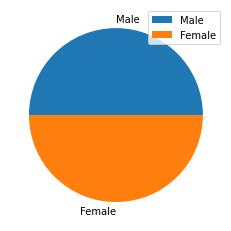

In [65]:
plt.pie(df['label'].value_counts(),labels=['Male','Female'])
plt.legend()

In [66]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]
print(x.shape)
print(type(x))
print(y.shape)
print(type(y))

(3168, 20)
<class 'pandas.core.frame.DataFrame'>
(3168,)
<class 'pandas.core.series.Series'>


In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(2534, 20)
(634, 20)
(2534,)
(634,)


In [68]:
m1=LogisticRegression()
m1.fit(x_train,y_train)

C:\Users\aman0\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [70]:
print('Training Score',m1.score(x_train,y_train))
print('Testing Score',m1.score(x_test,y_test))

Training Score 0.9080505130228888
Testing Score 0.9148264984227129


In [72]:
ypred_m1=m1.predict(x_test)
print(ypred_m1)

['male' 'male' 'female' 'male' 'male' 'female' 'male' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'female'
 'male' 'male' 'male' 'female' 'male' 'male' 'male' 'female' 'male'
 'female' 'male' 'male' 'female' 'female' 'male' 'male' 'male' 'female'
 'female' 'female' 'male' 'male' 'male' 'male' 'female' 'male' 'female'
 'male' 'male' 'female' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'female' 'female' 'female' 'male' 'female'
 'male' 'male' 'male' 'female' 'male' 'female' 'female' 'male' 'male'
 'female' 'male' 'female' 'male' 'male' 'female' 'male' 'male' 'female'
 'female' 'male' 'male' 'male' 'male' 'female' 'female' 'female' 'male'
 'male' 'male' 'male' 'female' 'male' 'female' 'male' 'male' 'male'
 'female' 'female' 'male' 'female' 'female' 'female' 'male' 'female'
 'female' 'female' 'male' 'female' 'male' 'female' 'female' 'female'
 'female' 'male' 'female' 'male' 'female' 'male' 'male' 'female' 'female'
 'female' 'male' '

In [73]:
cm=confusion_matrix(y_test,ypred_m1)
print(cm)
print(classification_report(y_test,ypred_m1))
print('Accuracy Score',accuracy_score(y_test,ypred_m1))

[[275  44]
 [ 10 305]]
              precision    recall  f1-score   support

      female       0.96      0.86      0.91       319
        male       0.87      0.97      0.92       315

    accuracy                           0.91       634
   macro avg       0.92      0.92      0.91       634
weighted avg       0.92      0.91      0.91       634

